# Lucrarea de laborator nr. 2

&copy; Cemîrtan Cristian, 2024

## Colectarea datelor

Seturile de date au fost descărcate de pe linkurile furnizate de CEC:

- Lista candidaților: https://pv.cec.md/api/api/reports/GetCandidates
- Prezența la vot pe regiuni: https://pv.cec.md/api/api/reports/GetElectionPresence?electionType=2
- Voturi pe regiuni: https://pv.cec.md/api/api/reports/GetElectionResults?electionType=2

Importăm bibliotecile necesare pentru prelucrarea datelor.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Încărcăm setul de date a candidaților.
Vom scoate coloana `Logo`, deoarece nu avem nevoie de iconografiile lor.

In [2]:
candidates = pd.read_json('Candidates.json').drop('Logo', axis=1)
candidates.head()

,CandidateId,Name
0,146985,USATÎI RENATO
1,146988,CHICU ION
2,146984,SANDU MAIA
3,146986,TARLEV VASILE
4,146989,NĂSTASE ANDREI


Încărcăm setul de date ce prevede prezența la vot pe regiune.

In [3]:
election_presence = pd.DataFrame([*pd.read_json('ElectionPresence.json')['Circumscriptions']])
election_presence.head()

,Type,KeyId,ElectionRoundId,Name,TotalVoters,TotalVoted,M,F,C1,C2,...,C6,C7,Total_C1,Total_C2,Total_C3,Total_C4,Total_C5,Total_C6,Total_C7,ElectionType
0,1,1,20166,Moldova,3023586,1562705,710314,852391,126287,230927,...,254792,70385,270488,499520,635314,485298,439008,336375,118172,2
1,2,2,20166,mun. CHIŞINĂU,668304,361786,158094,203692,31473,54796,...,57488,17142,53447,102734,143685,104718,93801,78988,28836,2
2,2,3,20166,mun. BĂLŢI,100098,51716,22112,29604,3775,7432,...,8942,2533,8408,16140,21432,15649,15452,12694,4657,2
3,2,5,20166,r-n ANENII NOI,68080,30617,14321,16296,2330,3554,...,6145,1341,5782,10280,14136,10713,10089,8307,2421,2
4,2,6,20166,r-n BASARABEASCA,23272,9084,4169,4915,531,880,...,2172,461,1822,3523,4874,3639,3529,2956,804,2


Încărcăm setul de date ce reprezintă voturile pe regiuni.

In [4]:
election_results = pd.DataFrame([*pd.read_json('ElectionResults.json')['Circumscriptions']])
election_results.head()

,ElectionType,Type,KeyId,ElectionRoundId,ElectionCompetitorId,ElectionCompetitorMemberId,TotalBalots,TotalBalotsProcessed,BallotsValidVotes,BallotCount
0,2,1,1,20166,34701,146985,2219,2219,1546031,213169
1,2,1,1,20166,34704,146988,2219,2219,1546031,31797
2,2,1,1,20166,34700,146984,2219,2219,1546031,656852
3,2,1,1,20166,34702,146986,2219,2219,1546031,49316
4,2,1,1,20166,34705,146989,2219,2219,1546031,9946


## Crearea unui DataFrame formatat

Acel DataFrame să aibă următoarele coloane:

- `Localitate` (considerand raionele din Chisinau ca localitati aparte)
- `Numar alegatori`
- `Numar total de voturi`
- `Voturi pentru Candidatul 1`
- `Voturi pentru Candidatul 2`
- ...
- `Voturi pentru Candidatul 11`
- `Numarul de voturi in categoria de varsta 18-25`
- `Numarul de alegatori in categoria de varsta 18-25`
- `Numarul de voturi in categoria de varsta 26-35`
- `Numarul de alegatori in categoria de varsta 26-35`
- ...

Vom crea acel DataFrame pe pași.

Mai întâi, vom crea un DataFrame cu voturile pentru fiecare candidat.

In [5]:
voted_candidates = election_results.pivot(index='KeyId', columns='ElectionCompetitorMemberId', values='BallotCount').rename(
    columns={x['CandidateId']: f'Voturi pentru {x['Name'].title()}' for _, x in candidates.iterrows()})

voted_candidates.head()

ElectionCompetitorMemberId,Voturi pentru Sandu Maia,Voturi pentru Usatîi Renato,Voturi pentru Tarlev Vasile,Voturi pentru Vlah Irina,Voturi pentru Chicu Ion,Voturi pentru Năstase Andrei,Voturi pentru Ţîcu Octavian,Voturi pentru Furtună Victoria,Voturi pentru Ulianovschi Tudor,Voturi pentru Morari Natalia,Voturi pentru Stoianoglo Alexandr
KeyId,,,,,,,,,,,
1,656852,213169,49316,83193,31797,9946,14326,68778,7995,9444,401215
2,173798,29698,9557,20333,8649,2330,3417,4605,2578,2641,100997
3,10833,9672,2034,8446,822,125,223,1135,192,311,17520
5,12269,4289,1054,1302,497,231,310,1374,117,240,8526
6,2615,937,906,950,95,31,79,718,19,40,2574


Vom determina top 3 candidați după voturi.

In [6]:
top_candidates = voted_candidates.sum().T.sort_values(ascending=False)[:3].index
[*top_candidates.str[len('Voturi pentru '):]]

['Sandu Maia', 'Stoianoglo Alexandr', 'Usatîi Renato']

Vom crea un DataFrame cu numărul de voturi și alegători în categorii de vârstă.

In [7]:
c_columns = []

ages = ('18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76+')
rename_dict = {}

for i, age in zip(range(1, 8), ages):
    c_columns.extend((f'C{i}', f'Total_C{i}'))
    rename_dict[f'C{i}'] = f'Voturi {age}'
    rename_dict[f'Total_C{i}'] = f'Alegatori {age}'

presence_by_city = election_presence[['KeyId', *c_columns]].rename(columns=rename_dict)
presence_by_city.head()

,KeyId,Voturi 18-25,Alegatori 18-25,Voturi 26-35,Alegatori 26-35,Voturi 36-45,Alegatori 36-45,Voturi 46-55,Alegatori 46-55,Voturi 56-65,Alegatori 56-65,Voturi 66-75,Alegatori 66-75,Voturi 76+,Alegatori 76+
0,1,126287,270488,230927,499520,308666,635314,266490,485298,305158,439008,254792,336375,70385,118172
1,2,31473,53447,54796,102734,78860,143685,59828,104718,62199,93801,57488,78988,17142,28836
2,3,3775,8408,7432,16140,10644,21432,8439,15649,9951,15452,8942,12694,2533,4657
3,5,2330,5782,3554,10280,5365,14136,5101,10713,6781,10089,6145,8307,1341,2421
4,6,531,1822,880,3523,1348,4874,1484,3639,2208,3529,2172,2956,461,804


În final, interclasăm DataFrame-urile create în unul singur.

In [8]:
df = pd.merge(
    election_presence[['KeyId', 'Name', 'TotalVoters', 'TotalVoted']],
    voted_candidates,
    on='KeyId')

df = pd.merge(df, presence_by_city, on='KeyId')
df = df.set_index('KeyId')

df = df.rename(columns={
    'Name': 'Localitate',
    'TotalVoters': 'Alegatori',
    'TotalVoted': 'Voturi'
})

df.head()

,Localitate,Alegatori,Voturi,Voturi pentru Sandu Maia,Voturi pentru Usatîi Renato,Voturi pentru Tarlev Vasile,Voturi pentru Vlah Irina,Voturi pentru Chicu Ion,Voturi pentru Năstase Andrei,Voturi pentru Ţîcu Octavian,...,Voturi 36-45,Alegatori 36-45,Voturi 46-55,Alegatori 46-55,Voturi 56-65,Alegatori 56-65,Voturi 66-75,Alegatori 66-75,Voturi 76+,Alegatori 76+
KeyId,,,,,,,,,,,,,,,,,,,,,
1,Moldova,3023586,1562705,656852,213169,49316,83193,31797,9946,14326,...,308666,635314,266490,485298,305158,439008,254792,336375,70385,118172
2,mun. CHIŞINĂU,668304,361786,173798,29698,9557,20333,8649,2330,3417,...,78860,143685,59828,104718,62199,93801,57488,78988,17142,28836
3,mun. BĂLŢI,100098,51716,10833,9672,2034,8446,822,125,223,...,10644,21432,8439,15649,9951,15452,8942,12694,2533,4657
5,r-n ANENII NOI,68080,30617,12269,4289,1054,1302,497,231,310,...,5365,14136,5101,10713,6781,10089,6145,8307,1341,2421
6,r-n BASARABEASCA,23272,9084,2615,937,906,950,95,31,79,...,1348,4874,1484,3639,2208,3529,2172,2956,461,804


## Calcularea corelațiilor

Încărcăm datele despre școlarizare din fiecare localitate, cu caracteristicile:

- `children_early_education` - numărul de copii în instituţiile de educaţie timpurie;
- `high_school_graduates` - numărul de absolvenţi din învățământul liceal;
- `teachers` - personalul didactic din instituțiile de învățământ primar și secundar general.

Sursă: https://statistica.gov.md/ro/educatia-in-republica-moldova-editiile-2009-2023-9676_59507.html

In [9]:
scolarizare = pd.read_csv('scolarizare.csv')
scolarizare = scolarizare.set_index('id')
scolarizare.head()

,children_early_education,high_school_graduates,teachers
id,,,
2,38766,4736,6998
3,5767,783,1014
5,2926,227,539
6,741,68,152
7,1878,245,559


Evident, ratele de școlarizare sunt corelate cu voturile.

In [10]:
columns = ['Voturi', 'Voturi pentru Sandu Maia', 'Voturi pentru Stoianoglo Alexandr', 'Voturi pentru Usatîi Renato']
scolarizare[columns] = df[columns]
scolarizare.corr()[columns][:-len(columns)].map(lambda x: f'{x * 100:.2f}%')

,Voturi,Voturi pentru Sandu Maia,Voturi pentru Stoianoglo Alexandr,Voturi pentru Usatîi Renato
children_early_education,99.86%,98.03%,97.88%,89.97%
high_school_graduates,99.42%,97.60%,97.77%,89.65%
teachers,99.85%,97.53%,98.44%,89.56%


Încărcăm unele date social-demografice:

- `divorces` - numărul de divorțuri;
- `marriages` - numărul de căsătorii;
- `salary` - câștigul salarial mediu lunar brut.

Sursă: https://statbank.statistica.md/PxWeb/pxweb/ro/60%20Statistica%20regionala/?rxid=2345d98a-890b-4459-bb1f-9b565f99b3b9

In [11]:
scolarizare = pd.read_csv('social.csv')
scolarizare = scolarizare.set_index('id')
scolarizare.head()

,divorces,marriages,salary
id,,,
2,565,4023,148843
3,464,627,109089
5,561,682,97228
6,25,102,92202
7,167,289,80499


Evident, ratele de școlarizare sunt corelate cu voturile.

In [12]:
columns = ['Voturi', 'Voturi pentru Sandu Maia', 'Voturi pentru Stoianoglo Alexandr', 'Voturi pentru Usatîi Renato']
scolarizare[columns] = df[columns]
scolarizare.corr()[columns][:-len(columns)].map(lambda x: f'{x * 100:.2f}%')

,Voturi,Voturi pentru Sandu Maia,Voturi pentru Stoianoglo Alexandr,Voturi pentru Usatîi Renato
divorces,57.17%,52.43%,57.18%,60.11%
marriages,99.52%,97.90%,97.41%,89.78%
salary,87.90%,89.22%,82.88%,84.57%


## Crearea diagramelor

### Hartă-diagramă

In [13]:
from IPython.display import HTML
import random as rd

regions = pd.read_csv('regions.csv')
regions = regions.set_index('id')

style = ''

def random_color(value):
    rd.seed(value + '6')
    return f'#{int(rd.random() * 0xffffff):06x}'

def add_style(index, color):
    global style
    
    if index in regions.index:
        name = regions.loc[index, 'region']    
        style += f'[aria-label="{name}"] {{ fill: {color} }}'

for index, row in voted_candidates.iterrows():
    top = row[top_candidates].sort_values(ascending=False)
    add_style(index, random_color(top.index[0]))

style = f"<style>{style}</style>"

for top in top_candidates:
    style += f'<p><span style="color: {random_color(top)}">■</span> {top}</p>'

with open('harta.html', encoding='utf-8') as f:
    page = style + f.read()
    htmlMap = HTML(page) 

htmlMap

### Diagrama cu distributia voturilor pe varste

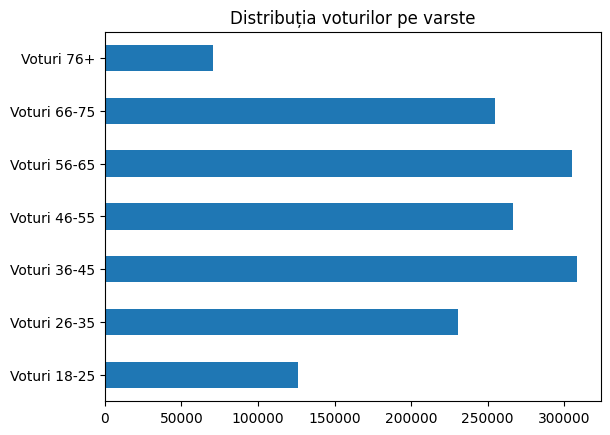

In [14]:
current_votes = df[list(rename_dict.values())[::2]].iloc[0]

current_votes.plot(kind='barh')
plt.title('Distribuția voturilor pe varste')
plt.show()

### Diagrama cu votanti pe categorii de varste

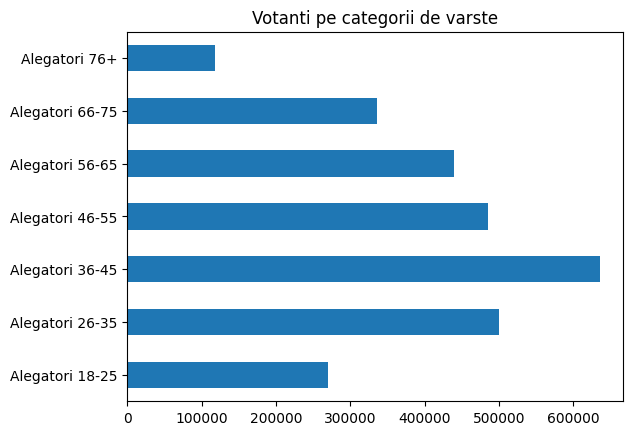

In [15]:
df[list(rename_dict.values())[1::2]].iloc[0].plot(kind='barh')
plt.title('Votanti pe categorii de varste')
plt.show()

### Analiza a nr. de voturi cu alegerile prezidentiale anterioare (turul I)

CEC nu a memorizat prezența la vot pe grupe de vârste din anul 2020, deci am găsit datele de pe site-ul http://www.radioplai.md/bilantul-preliminar-al-alegerilor-prezidentiale/.

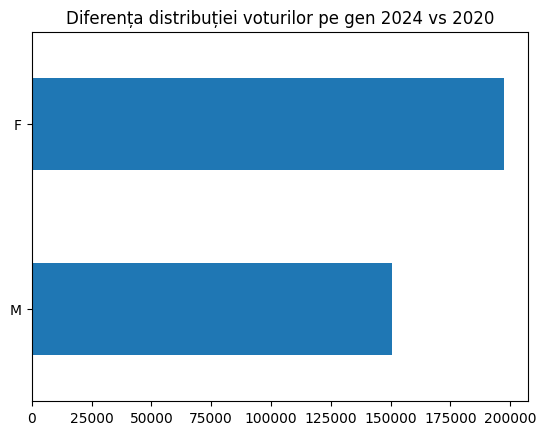

In [16]:
(election_presence[['M', 'F']].iloc[0] - [559858, 654899]).plot(kind='barh')
plt.title('Diferența distribuției voturilor pe gen 2024 vs 2020')
plt.show()

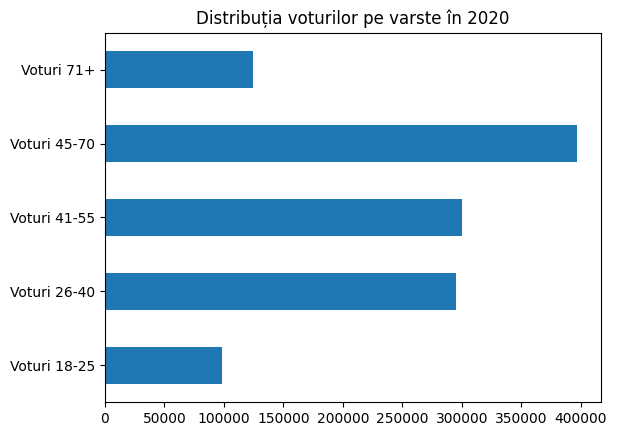

In [17]:
prev_votes = pd.Series({
    'Voturi 18-25': 98098,
    'Voturi 26-40': 294907,
    'Voturi 41-55': 299951,
    'Voturi 45-70': 397139,
    'Voturi 71+': 124659
})

prev_votes.plot(kind='barh')
plt.title('Distribuția voturilor pe varste în 2020')
plt.show()